# Imports 

In [24]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
%matplotlib inline

###### Shortcuts
1. Command --esc
2. Editor  --Enter
3. Markdown -- m
4. Fonte Size --1,2,3,4,5,6
5. Run Cell and insert belwo -- shift+enter
6. Run Cell -- Ctrl + enter

In [6]:
tf.__version__

'0.11.0'

# Load Data

In [8]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets("data/MINST/",one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting data/MINST/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting data/MINST/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting data/MINST/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting data/MINST/t10k-labels-idx1-ubyte.gz


In [9]:
print("Size of:")
print("- Training-set:\t\t{}". format(len(data.train.labels)))
print("- Test-set:\t\t{}". format(len(data.test.labels)))
print("- Validation-set:\t{}".format(len(data.validation.labels)))

Size of:
- Training-set:		55000
- Test-set:		10000
- Validation-set:	5000


# One-hot Encoding 

In [10]:
data.test.labels[0:5,:]

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.]])

In [11]:
data.test.cls = np.array([label.argmax() for label in data.test.labels])

In [13]:
data.test.cls[0:5]

array([7, 2, 1, 0, 4])

# Data dimensions 

In [14]:
# MINST images are 28 pixels in each dimension
img_size = 28

#Images are stored in one-dimensional arrays of this length
img_size_flat = img_size * img_size

#Tuple with height and width of images used to reshape array
img_shape = (img_size, img_size)

#NUmber of classes, one class for each of 10 digits
num_classes=10

## Helper-function for plotting images 

In [26]:
def plot_images(images,cls_true,cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    #create figure with 3*3 subplots
    fig,axes = plt.subplots(3,3)
    fig.subplots_adjust(hspace=0.3,wspace=0.3)
    
    for i, ax in enumerate(axes.flat):
        #plot image
        ax.imshow(images[i].reshape(img_shape),cmap='binary')
        
        #show true and predicted classes.
        if cls_pred is None:
            xlabel = "True:{0}".format(cls_true[i])
        else:
            xlabel = "True:{0}, Pred: {1}".format(cls_true[i],cls_pred[i])
        ax.set_xlabel(xlabel)
        
        #remove ticks from the plot
        ax.set_xticks([])
        ax.set_yticks([])
    #plt.show()

##  Plot a few images to see if data is correct

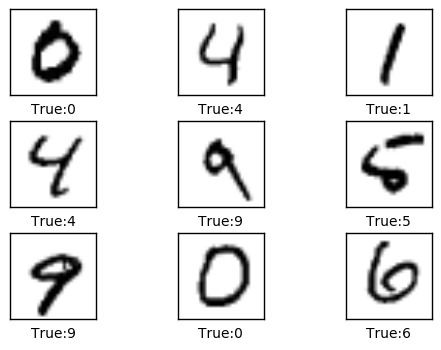

In [29]:
images = data.test.images[3:12]

cls_true = data.test.cls[3:12]

plot_images(images=images,cls_true=cls_true)

In [30]:
x = tf.placeholder(tf.float32,[None,img_size_flat])

In [31]:
y_true = tf.placeholder(tf.float32,[None,num_classes])

In [33]:
y_true_cls= tf.placeholder(tf.int64,[None])

### Variables to be optimized 

In [34]:
#weights is a 2-dimensional tensor with img_size_flat rows and num_classes columns
weights = tf.Variable(tf.zeros([img_size_flat,num_classes]))

#bias is a 1-dimensional tensor of length num_class
biases = tf.Variable(tf.zeros([num_classes]))